In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan

sns.set()

In [59]:
output_file = 'results/pruebas/test'

total_metrics = pd.read_csv(f'{output_file}.csv').reset_index(drop=True)

total_metrics["n_features"] = total_metrics.selected_features.apply(eval).apply(len)

total_metrics.drop("dataset_name", inplace=True, axis=1)

In [60]:
total_metrics[['dataset', 'model_name', 'root_mean_squared_error', 'model_params_max_depth', 'model_params_n_estimators']].sort_values(by='root_mean_squared_error')

,dataset,model_name,root_mean_squared_error,model_params_max_depth,model_params_n_estimators
27,torneo,parallel_boosting,25.324798,2,10
80,torneo_single,parallel_boosting,26.562583,2,10
71,torneo_single,parallel_boosting,26.920357,2,10
6,torneo,multi_boosting,27.139556,4,10
0,torneo,multi_boosting,27.139556,2,10
...,...,...,...,...,...
49,torneo_single,multi_boosting,55.198540,3,100
99,demand_single,multi_boosting,1983.277277,2,50
100,demand_single,multi_boosting,2031.328887,2,100
98,demand_single,multi_boosting,2170.070655,2,10


In [61]:
best_results = total_metrics.loc[total_metrics.groupby(['dataset', 'model_name'], dropna=False).mean_absolute_error.idxmin()].reset_index()

best_results.pivot(index="dataset", columns="model_name", values=["mean_absolute_error", "mean_squared_error", "root_mean_squared_error"]).round(2)

mean_absolute_error                   mean_squared_error  \
model_name         multi_boosting parallel_boosting     multi_boosting   
dataset                                                                  
demand_single             1346.70               NaN         3933388.76   
torneo                      20.91             19.56             736.56   
torneo_single               21.81             20.61             751.53   

                                root_mean_squared_error                    
model_name    parallel_boosting          multi_boosting parallel_boosting  
dataset                                                                    
demand_single               NaN                 1983.28               NaN  
torneo                   641.35                   27.14             25.32  
torneo_single            705.57                   27.41             26.56

In [62]:
best_results.pivot(index="dataset", columns="model_name", values=["duration"]).round(2)

duration                  
model_name    multi_boosting parallel_boosting
dataset                                       
demand_single           0.85               NaN
torneo                  1.16             13.24
torneo_single           0.42              4.79

In [63]:
best_results.pivot(index="dataset", columns="model_name", values=["model_params_max_depth", "model_params_n_estimators"]).round(2)

model_params_max_depth                    \
model_name            multi_boosting parallel_boosting   
dataset                                                  
demand_single                    2.0               NaN   
torneo                           2.0               2.0   
torneo_single                    2.0               2.0   

              model_params_n_estimators                    
model_name               multi_boosting parallel_boosting  
dataset                                                    
demand_single                      50.0               NaN  
torneo                             10.0              10.0  
torneo_single                      10.0              10.0

<Figure size 2000x2000 with 0 Axes>

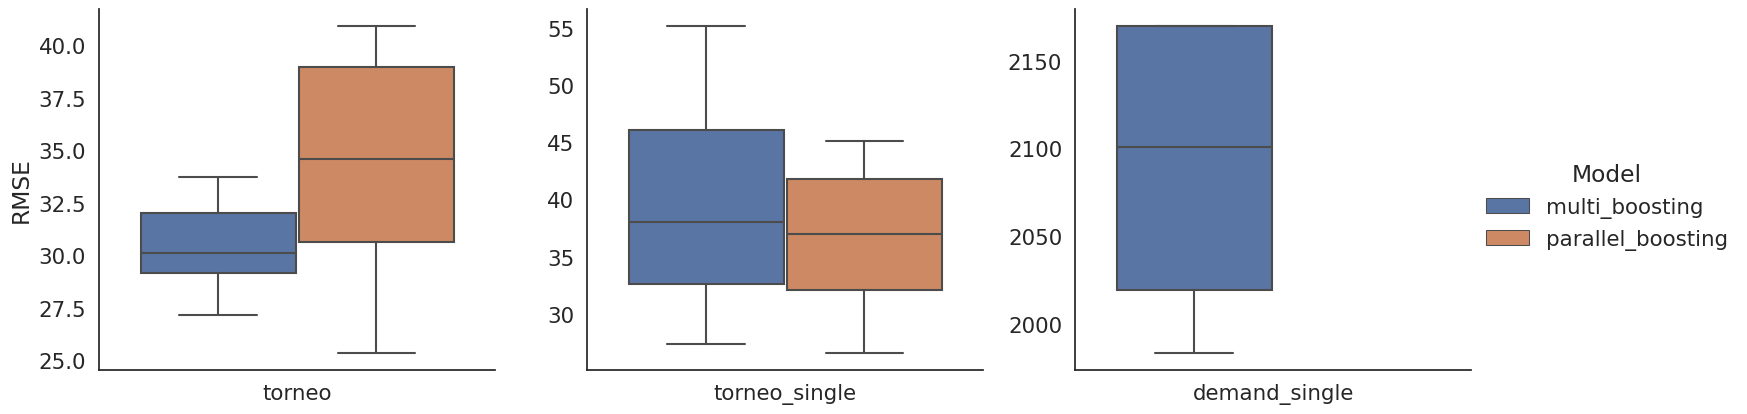

In [64]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
#total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)
total_metrics = total_metrics.rename({'model_name': 'Model', 'root_mean_squared_error': 'RMSE', 'n_features': '# Features'}, axis=1)
g = sns.catplot(data=total_metrics, kind='violin', x='dataset', y="RMSE", col='dataset', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.show()

<Figure size 2000x2000 with 0 Axes>

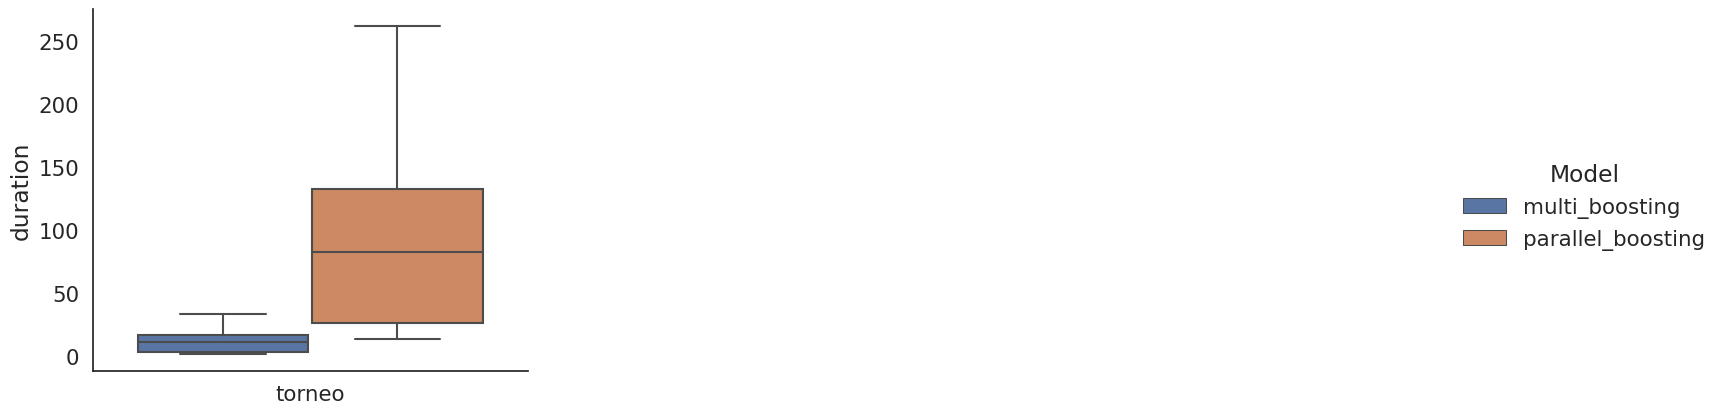

In [23]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
g = sns.catplot(data=total_metrics, kind='box', x='dataset', y="duration", col='dataset', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.show()

<Figure size 2000x2000 with 0 Axes>

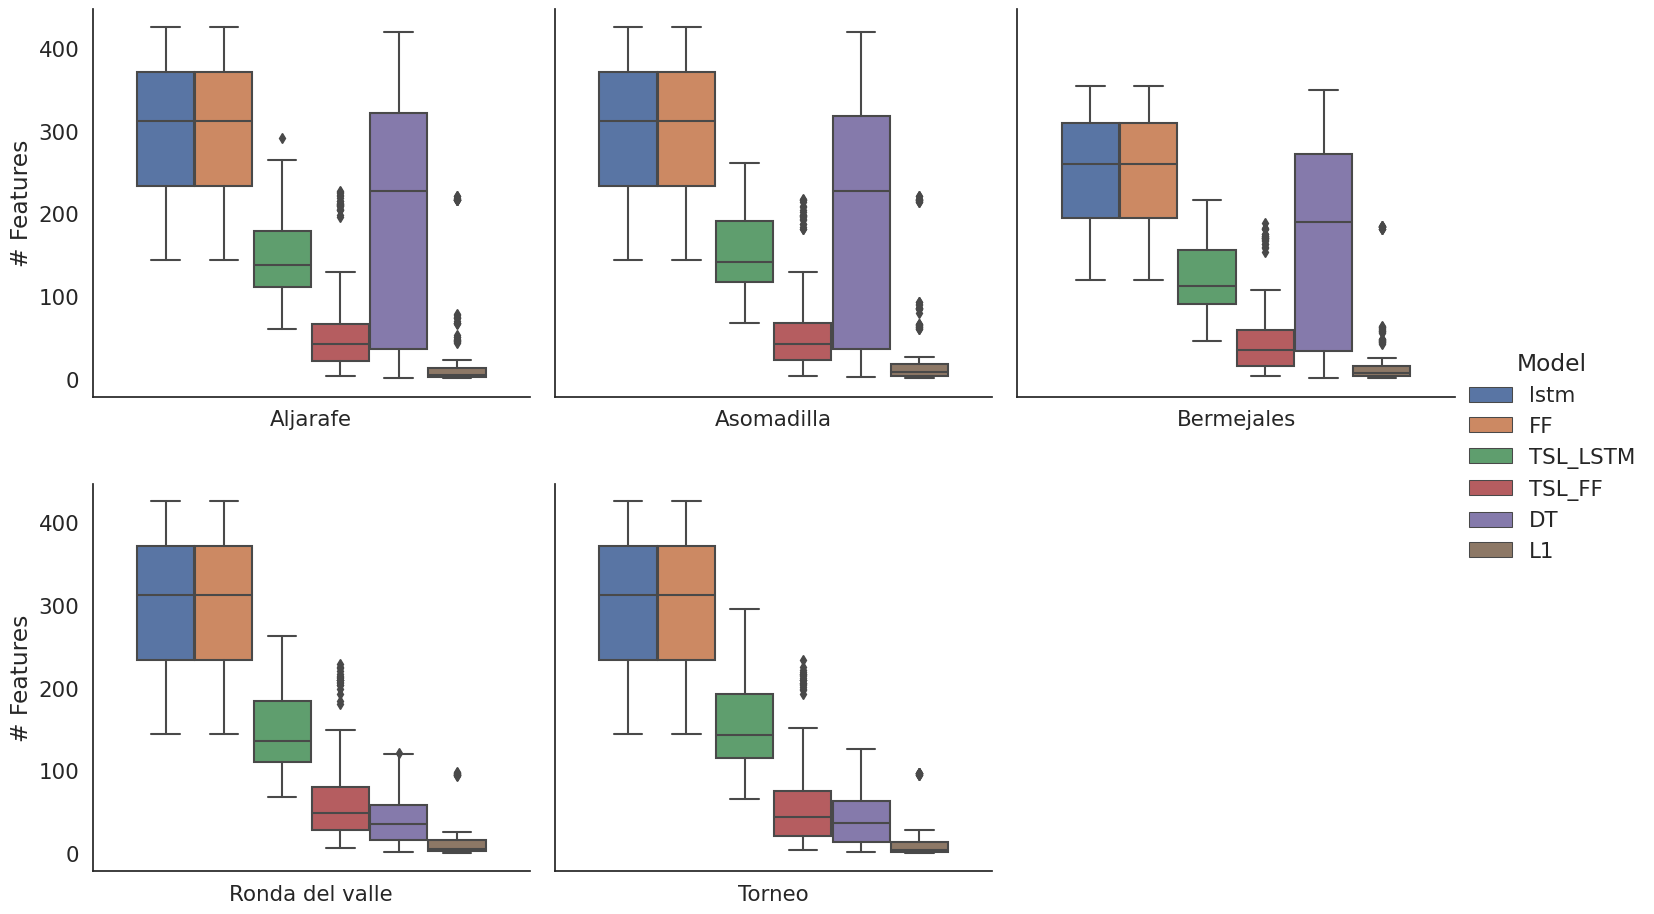

In [25]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)

g = sns.catplot(data=total_metrics[(total_metrics.dataset_params_test_year>2005)], kind='box', x='dataset', y="# Features", col='dataset', hue='Model', sharex=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.savefig('figures/boxplot_Features.png')
plt.show()
plt.show()

## Selection masks

In [1]:
sns.set(font_scale=2.8)
best_by_year_selected = best_by_year[best_by_year.dataset_params_test_year>2005]

fetures_list = ['tmp', 'vv', 'dd', 'no2', 'pm10', 'o3']
for dataset in best_by_year_selected.dataset.unique():
    results_tsl_dataset = best_by_year_selected[(best_by_year_selected.dataset==dataset) & (best_by_year_selected.model_name=='TSL+LSTM')].sort_values('dataset_params_test_year')
    results_tsl_dataset1 = best_by_year_selected[best_by_year_selected['dataset_params_test_year']==2015]
    features = results_tsl_dataset.features.apply(eval).apply(np.array).values[0]
    selected_features = results_tsl_dataset.selected_features.apply(eval).apply(np.array).values[0]

    selection_masks = []
    for feat in fetures_list:
        
        feats = features[np.core.defchararray.find(features, feat)!=-1]
        if len(feats)==0:
            continue
        sfeats = selected_features[np.core.defchararray.find(selected_features, feat)!=-1]

        
        mask = np.isin(feats, sfeats).astype(np.uint)
        selection_masks.append(mask)
    
    selection_masks = np.stack(selection_masks)
    print(selection_masks.sum()/(selection_masks.shape[0]*selection_masks.shape[1]))
    fig, ax = plt.subplots(figsize=(30,10))

    ax.set_title(f'Selected features in {dataset} for year 2015')
    cmap = sns.cm.crest_r
    g = sns.heatmap(selection_masks, yticklabels=list(map(lambda x: x.upper(), fetures_list)),cmap=cmap, xticklabels=list(map(lambda f: f.replace('target_o3 t', ''), feats.tolist())), cbar=False, linewidth=.5, ax=ax)
    plt.xticks(rotation=45)
    fig = g.get_figure()
    fig.savefig(f"figures/SelectionMasks/Ozone_{dataset}.png", bbox_inches='tight') 

NameError: name 'sns' is not defined

## Results by year

In [88]:

best_metrics = total_metrics_indexed.loc[best_index].reset_index()
best_metrics = best_metrics.groupby(['dataset', 'model_name', 'dataset_params_test_year'], dropna=False)[['root_mean_squared_error']].mean().reset_index()
best_metrics = best_metrics.rename({'dataset_params_test_year': 'year'}, axis=1)
best_metrics = best_metrics[(best_metrics.year>2005)]
best_metrics = best_metrics[best_metrics.model_name.isin(["L1", "TSL+FF", "TSL+LSTM"])]
best_metrics.pivot(index = ['year'], columns=[ 'dataset','model_name'], values='root_mean_squared_error').round(1)#.to_latex()

dataset    Aljarafe                 Asomadilla                 Bermejales  \
model_name       L1 TSL+FF TSL+LSTM         L1 TSL+FF TSL+LSTM         L1   
year                                                                        
2006           17.5   17.4     17.4       17.5   18.3     18.2       18.4   
2007           15.8   16.4     16.1       16.5   16.6     16.3       18.6   
2008           17.0   17.0     17.0       17.3   17.3     17.1       19.1   
2009           16.8   16.9     17.4       16.3   16.6     16.2       18.8   
2010           17.1   17.0     16.4       16.2   16.5     15.4       20.1   
2011           15.9   16.2     15.3       16.8   16.7     17.6       17.4   
2012           17.1   17.1     17.0       15.9   15.7     15.4       18.0   
2013           15.5   15.7     15.0       15.0   15.5     15.1       17.8   
2014           15.8   15.5     15.5       16.2   16.4     16.0       17.3   
2015           18.2   17.5     16.1       15.6   15.6     15.5       16.6   

dataset                    Ronda del valle                 Torneo         \
model_name TSL+FF TSL+LSTM              L1 TSL+FF TSL+LSTM     L1 TSL+FF   
year                                                                       
2006         18.8     18.0            20.0   19.6     19.7   13.3   13.1   
2007         19.3     18.3            19.5   19.4     19.2   13.4   13.4   
2008         18.3     18.3            20.4   20.5     20.0   13.3   13.6   
2009         19.2     18.6            19.0   19.1     18.7   14.1   14.0   
2010         19.3     19.8            20.9   19.6     20.1   14.5   14.5   
2011         17.0     17.2            18.5   18.5     18.5   14.4   14.1   
2012         18.1     18.1            15.9   15.6     15.1   15.0   14.6   
2013         17.2     17.6            17.2   17.0     16.9   14.4   14.3   
2014         17.3     17.7            17.9   17.5     17.4   14.3   14.0   
2015         16.8     17.4            17.5   17.4     17.1   14.8   14.4   

dataset              
model_name TSL+LSTM  
year                 
2006           13.5  
2007           13.3  
2008           13.4  
2009           14.1  
2010           15.1  
2011           14.0  
2012           14.5  
2013           14.0  
2014           14.1  
2015           14.3

## Bayesian tests

Aljarafe
(0.05076777275790345, 0.12935638999146104, 0.8198758372506355)
Asomadilla
(0.602895547675582, 0.10875292478995702, 0.288351527534461)
Bermejales
(0.03313082773446413, 0.12024413473288698, 0.8466250375326488)
Ronda del valle
(0.211954572140984, 0.23879189133067558, 0.5492535365283404)
Torneo
(0.9474553885433044, 0.044262588874285025, 0.00828202258241062)


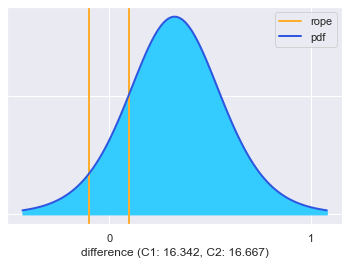

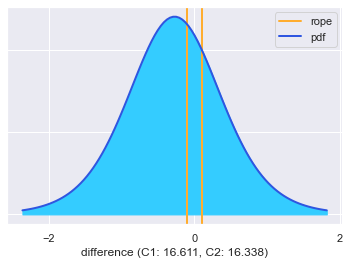

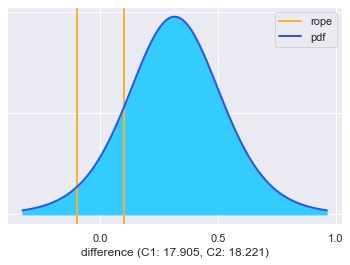

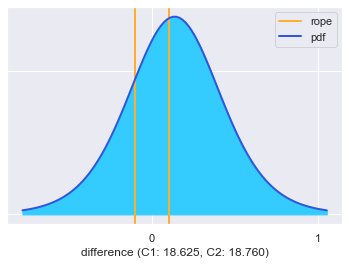

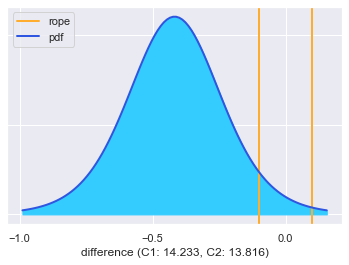

In [64]:
from baycomp import two_on_single


for dataset in best_metrics.dataset.unique():
    metrics_tsl = best_metrics[(best_metrics.dataset==dataset) & (best_metrics.model_name=='TSL')].root_mean_squared_error.values
    metrics_l1 = best_metrics[(best_metrics.dataset==dataset) & (best_metrics.model_name=='L1')].root_mean_squared_error.values
    probs, fig = two_on_single(metrics_tsl, metrics_l1, rope=0.1, plot=True)

    print(probs)
    fig.savefig(f"figures/Baytest/Baytest{dataset}.png") 

## Best hyperparameters

In [89]:
best_hyperparameters = best_index.to_frame()[['dataset', 'model_name']].reset_index(drop=True)
seq_lens = total_metrics_indexed.groupby(['dataset', 'model_name']).head(1)['dataset_params_seq_len'].reset_index(drop=True)

In [91]:
pd.set_option('display.max_colwidth', 2000)
seq_lens = total_metrics_indexed.groupby(['dataset', 'model_name']).head(1)['dataset_params_seq_len'].reset_index(drop=True)
params = list(map(lambda my_dict: {k: my_dict[k] if not my_dict[k].is_integer() else int(my_dict[k]) for k in my_dict if not isnan(my_dict[k])},best_index.to_frame()[best_index.to_frame().model_name!='TSLRes'].loc[:, ['model_params_layers', 'model_params_units', 'model_params_batch_size', 'model_params_lr','model_params_dropout',  'model_params_max_depth', 'model_params_regularization','selection_params_regularization']].to_dict('records')))
best_hyperparameters['window'] = seq_lens #
best_hyperparameters['params'] = params

best_hyperparameters[best_hyperparameters.model_name=="TSL+LSTM"].set_index(['dataset']).to_dict('index')#.to_latex('tab.tex')

{'Aljarafe': {'model_name': 'TSL+LSTM',
  'window': 31,
  'params': {'model_params_layers': 1,
   'model_params_units': 18,
   'model_params_batch_size': 44,
   'model_params_lr': 0.0058554533800052,
   'model_params_dropout': 0.3719129270375464,
   'selection_params_regularization': 0.0097002028888842}},
 'Asomadilla': {'model_name': 'TSL+LSTM',
  'window': 28,
  'params': {'model_params_layers': 1,
   'model_params_units': 36,
   'model_params_batch_size': 29,
   'model_params_lr': 0.0003802342314058,
   'model_params_dropout': 0.0099400669198977,
   'selection_params_regularization': 0.0024621860549236}},
 'Bermejales': {'model_name': 'TSL+LSTM',
  'window': 31,
  'params': {'model_params_layers': 1,
   'model_params_units': 36,
   'model_params_batch_size': 29,
   'model_params_lr': 0.0003802342314058,
   'model_params_dropout': 0.0099400669198977,
   'selection_params_regularization': 0.0024621860549236}},
 'Ronda del valle': {'model_name': 'TSL+LSTM',
  'window': 58,
  'params': 